In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
dataset = pd.read_csv("Sales.csv")

In [3]:
dataset.head()

,SL NO,WEEK,SALES
0,1,1,1200
1,2,2,1800
2,3,3,2600
3,4,4,3200
4,5,5,3800


In [4]:
# Data Pre-Processing
dataset.shape

(5, 3)

In [5]:
dataset.isna().sum()

SL NO    0
WEEK     0
SALES    0
dtype: int64

In [6]:
# 2. Checking for duplicate rows
dataset.duplicated().any()

False

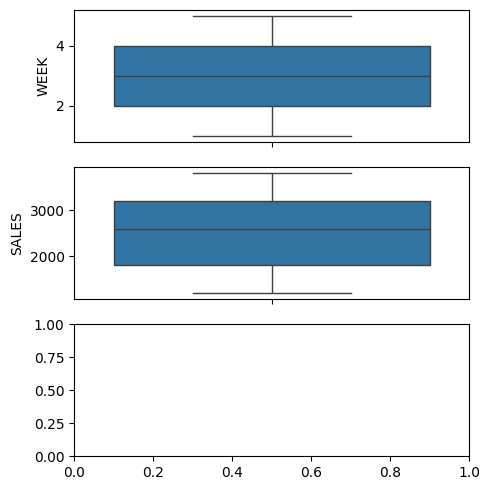

In [7]:
#3. Checking for outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['WEEK'], ax = axs[0])
plt2 = sns.boxplot(dataset['SALES'], ax = axs[1])
plt.tight_layout()

C:\Users\Adnan\AppData\Local\Temp\ipykernel_4300\1036009413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['SALES']);


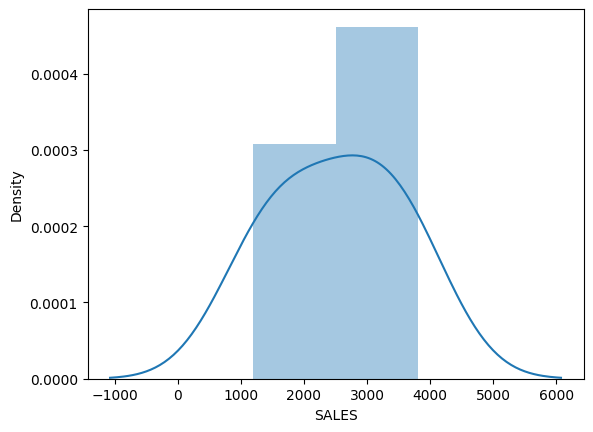

In [8]:
#  Exploratory Data Analysis
# 1. Distribution of the target variable
sns.distplot(dataset['SALES']);

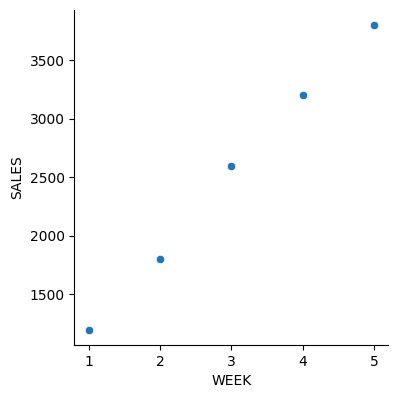

In [9]:
#2. How Sales are related with other variables
sns.pairplot(dataset, x_vars=['WEEK'], y_vars='SALES', height=4, aspect=1, kind='scatter')
plt.show()

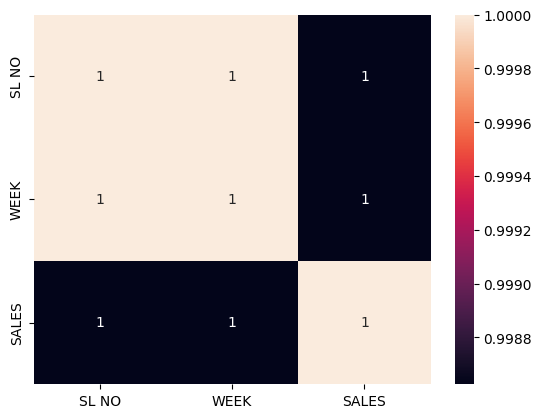

In [10]:
 # 3. Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
#Setting the value for X and Y
x = dataset[['WEEK']]
y = dataset['SALES']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [14]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [15]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  542.8571428571429
Coefficient: [657.14285714]


In [16]:
print('Regression Equation: Sales = 657.14 + 542.857 * WEEK')

Regression Equation: Sales = 657.14 + 542.857 * WEEK


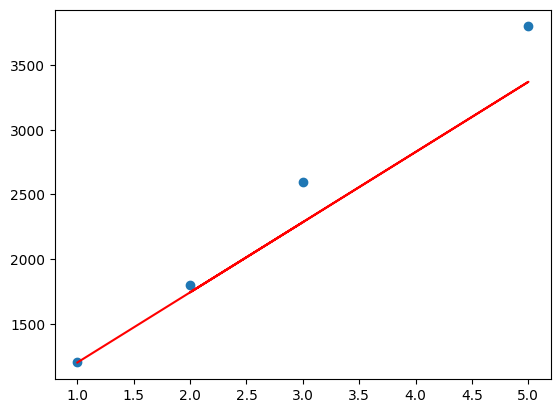

In [17]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 657.14 + 542.857*x_train, 'r')
plt.show()

In [18]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train) 

In [19]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [3171.42857143]


In [20]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
3,3200,3171.428571


In [21]:
slr.predict([[7]])

C:\Users\Adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5142.85714286])

In [22]:
slr.predict([[12]])

C:\Users\Adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8428.57142857])